In [16]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [22]:
data_file = 'val_pred.tsv'

In [23]:
data = pd.read_csv(data_file, sep='\t')
data.describe()

,Unnamed: 0,tweet_id,class,prediction
count,6090.000000,6.090000e+03,6090.000000,6090.000000
mean,3044.500000,9.908965e+17,0.087521,0.091954
std,1758.175901,1.483414e+17,0.282620,0.288985
min,0.000000,6.420532e+17,0.000000,0.000000
25%,1522.250000,8.992050e+17,0.000000,0.000000
50%,3044.500000,1.026070e+18,0.000000,0.000000
75%,4566.750000,1.111609e+18,0.000000,0.000000
max,6089.000000,1.202526e+18,1.000000,1.000000


In [31]:
actual = data['class']
predict = data['prediction']
print(classification_report(actual, predict))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5557
           1       0.93      0.98      0.95       533

    accuracy                           0.99      6090
   macro avg       0.96      0.98      0.97      6090
weighted avg       0.99      0.99      0.99      6090



Predicted     0    1
Actual              
0          5517   40
1            13  520


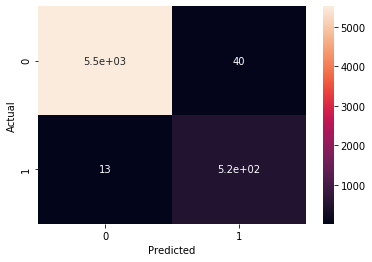

In [29]:
confusion_matrix = pd.crosstab(actual, predict, rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)
sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [32]:
data[data['class'] != data['prediction']]

,Unnamed: 0,tweet_id,tweet,class,prediction
1,1,1035908416869462016,15) На прошлой зимней олимпиаде большинство лы...,1,0
178,178,1038317572968640514,До этого у меня был Паксил. Но это пиздец был....,0,1
260,260,1118110843168788480,Где-то неделю назад я решила в очередной раз с...,0,1
344,344,674824036325662720,#CocaColaЧитаетМандаринку эти таблетки убивают...,0,1
728,728,1150794056223641600,"И да, вальдоксан очень многие хвалили ещё. Оче...",0,1
740,740,1121630696244531206,Мне тоже назначали это для сна (только в виде ...,0,1
846,846,1021865021775769601,"Есть перестал, прозак криво вставлял, с травой...",0,1
1196,1196,1106962109097746432,"Ну, по факту анорексия жеж психическое заболев...",0,1
1233,1233,1083295601121509378,"пожалуй самый лучший антидепрессант, так же яв...",0,1
1255,1255,1070458425035890688,бже блять какая антидепрессанты охуенная штук...,0,1


In [35]:
false_pos = data[(data['class'] == 0) & (data['prediction'] == 1)]
false_neg = data[(data['class'] == 1) & (data['prediction'] == 0)]

In [52]:
for tweet in false_pos['tweet'].to_list():
    print(tweet, end='\n\n')

До этого у меня был Паксил. Но это пиздец был. Вот пропила пачку, врач посоветовал Новопассит. Купила вчера в сиропе. На удивление, реветь хочется меньше, до этого вообще каждую секунду ревела, но сейчас что-то стопит. Мб самовнушение, но основные негативные чувства притупились

Где-то неделю назад я решила в очередной раз снизить дозировку нейролептика (кветиапин), потому что почувствовала, что мне он мешает (это отдельная история, не без просветлений обошлось). Первые несколько дней я просто как-то очень уставшей себя чувствовала, но мне не впервой.

#CocaColaЧитаетМандаринку эти таблетки убивают аппетит лучше Флуоксетина. я готова их горстями есть, лишь бы не чувствовать ничего.

И да, вальдоксан очень многие хвалили ещё. Очень мало неприятных побочек, в отличие от СИОЗС типа паксила и его вариаций. Не даёт скачков веса, суицидальных порывов и не влияет на либидо.

Мне тоже назначали это для сна (только в виде сероквеля). 25 мг вырубали, но функционировать на следующий день было сло

In [53]:
for tweet in false_neg['tweet'].to_list():
    print(tweet, end='\n\n')

15) На прошлой зимней олимпиаде большинство лыжников приехало со справкой о том что у них якобы астма. Сделано это было для того, чтобы легально принимать сальбутамол (то же что и я принимаю в ингаляторах) который расширяет объём легких. По сути допинг для здорового человека.

надеюсь мне купят флуоксетин и я ещё месяц смогу жить как полу овощ

ксанакс с бухлишком же смешивать не рекомендуют!

В тему о беречь родителей. Нашла у матери таблетки «метформин». Говорит, сестра ей дала для похудения. Таблетки от сахарного диабета. С кучей побочек и большой вероятностью отказа почек. Вставила словесных пиздюлей обоим!

было дело - Амизон, Цифран, много пил тёплой воды, только так.

хочешь спать - не можешь до 4 утра, хочешь позалипать в какую-либо хуйню в два часа ночи - рубит как на отходах от ксанакса

ещё одна таблетка тригексифенидила или кветиапина и можете заказывать мне гроб

Думаю - какого хрена вернулась головная боль, сонливость, раздражение.  Доза ксанакса на сегодня всё ещё меня о

In [61]:
def analyze(filepath, original_class='class', predicted_class='prediction'):
    
    data = pd.read_csv(filepath, sep='\t')
    data.describe()
    
    actual = data[original_class]
    predict = data[predicted_class]
    print(classification_report(actual, predict))
    
    confusion_matrix = pd.crosstab(actual, predict, rownames=['Actual'], colnames=['Predicted'])
    print (confusion_matrix)
    sn.heatmap(confusion_matrix, annot=True)
    plt.show()
    
    false_pos = data[(data['class'] == 0) & (data['prediction'] == 1)]
    false_neg = data[(data['class'] == 1) & (data['prediction'] == 0)]
    
    print(f'data analyzed, returning {len(false_pos)} false_positives and {len(false_neg)} false_negatives')
    return false_pos['tweet'].to_list(), false_neg['tweet'].to_list()

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5557
           1       0.93      0.98      0.95       533

    accuracy                           0.99      6090
   macro avg       0.96      0.98      0.97      6090
weighted avg       0.99      0.99      0.99      6090

Predicted     0    1
Actual              
0          5517   40
1            13  520


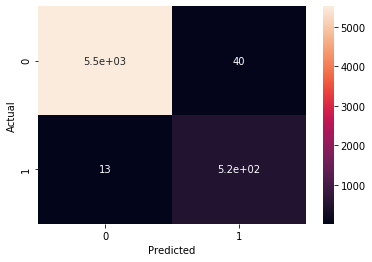

data analyzed, returning 40 false_positives and 13 false_negatives


In [62]:
f_p, f_n = analyze('train_pred.tsv')